In [2]:
import pandas as pd  # import the neccessary libraries
pd.set_option('display.max_columns', 300)  # display all the columns
pd.set_option('display.max_rows', 100)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('seaborn')
sns.set(style="white")

In [3]:
df = pd.read_csv('kc_house_data_train.csv')# read in the csv file with train data
print(df.shape)  # check the dimensions of the model
df.head()   # print the first 5 rows

(17290, 22)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
##### Cleaning for EDA #####

#Add Log_Price
df['log_price'] = np.where(df['price'], np.log(df['price']), df['price'])

#Turn 'sqft_basement' into binary "Basement" column
df['basement'] = np.where(df['sqft_basement'] > 0, 1, 0)

#Create Bathrooms per Beds Columns
df['bath_per_bed'] = np.where(df['bedrooms'] > 0, df['bathrooms'] / df['bedrooms'], 0)

In [5]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,basement,bath_per_bed
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824,13.048109,0.393638,0.639717
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583,0.526865,0.488570,0.213352
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000,11.225243,0.000000,0.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000,12.679196,0.000000,0.500000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000,13.017003,0.000000,0.625000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000,13.377006,1.000000,0.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000,15.856731,1.000000,2.500000


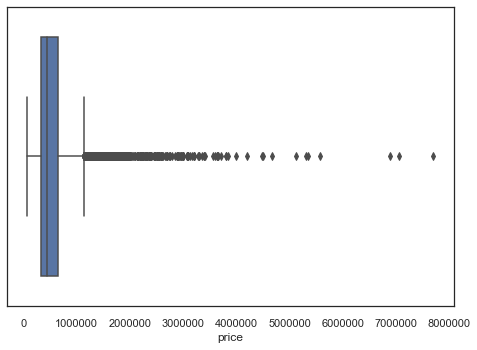

In [6]:
sns.boxplot(df.price)

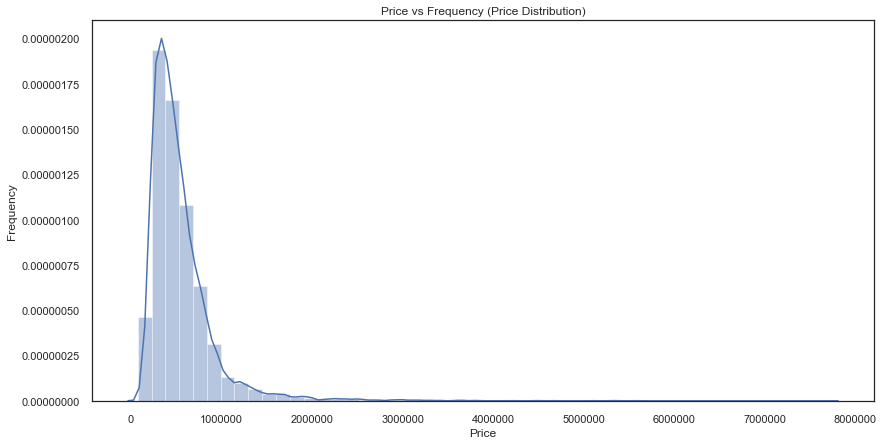

In [7]:
#Check price distribution *****
fig, ax = plt.subplots(figsize = (14,7));
sns.distplot(df.price, kde=True, bins=50);
ax.set(xlabel='Price', ylabel='Frequency', title='Price vs Frequency (Price Distribution)');
plt.savefig("Price_vs_Frequency.png")

In [8]:
IQR = df.price.quantile(0.75) - df.price.quantile(0.25)
upper_limit = df.price.quantile(0.75) + (IQR * 1.5)
upper_limit_extreme = df.price.quantile(0.75) + (IQR * 10)
upper_limit, upper_limit_extreme


(1131000.0, 3885000.0)

In [9]:
total = np.float(df.shape[0])
print('Total Houses: {}'.format(df.price.shape[0]/total))
print('Percent of Houses priced > $1,131,000: {}'.format(df[df.price>upper_limit].shape[0]/total))
print('Percent of Houses priced > $2,589,000: {}'.format(df[df.price>upper_limit_extreme].shape[0]/total))

Total Houses: 1.0
Percent of Houses priced > $1,131,000: 0.0518796992481203
Percent of Houses priced > $2,589,000: 0.0006940427993059572


In [10]:
#Test to see how it effects my data to decrease extreme outliers
df['price'] = np.where(df['price'] > upper_limit_extreme, upper_limit, df['price'])
df[df['price'] >= upper_limit_extreme]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,basement,bath_per_bed


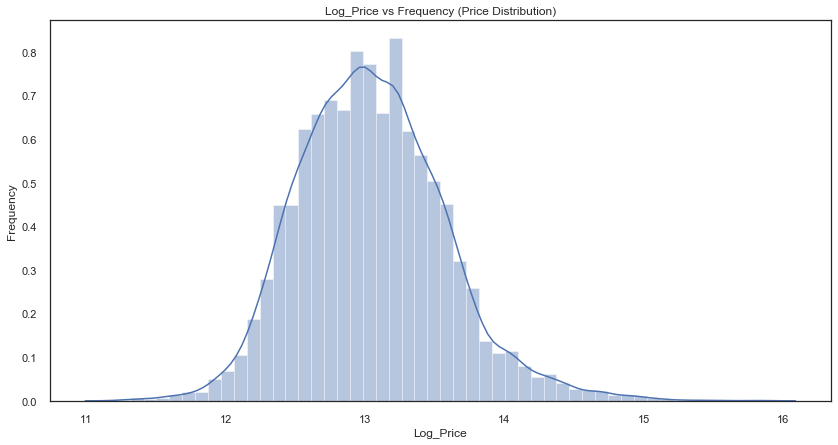

In [11]:
#Check log price distribution ***** Note: Comes out much more normally distributed
fig, ax = plt.subplots(figsize = (14,7));
sns.distplot(df.log_price, kde=True, bins=50);
ax.set(xlabel='Log_Price', ylabel='Frequency', title='Log_Price vs Frequency (Price Distribution)');
plt.savefig("Log_Price_vs_Frequency.png")

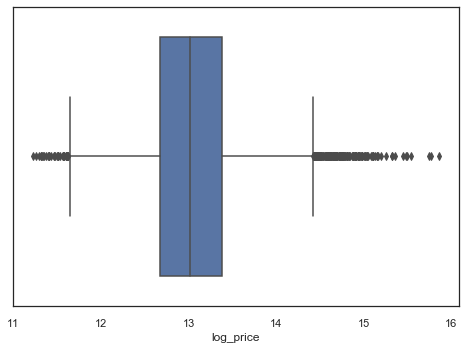

In [73]:
sns.boxplot(df.log_price)

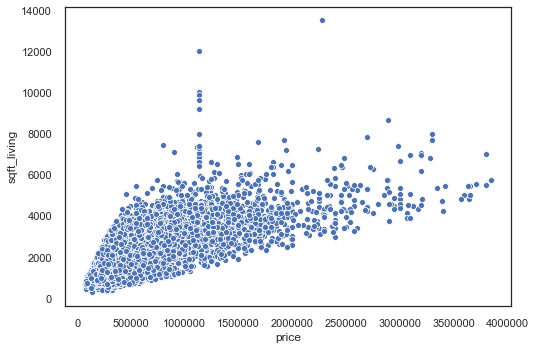

In [12]:
sns.scatterplot(df.price,df.sqft_living)
plt.savefig("Price_vs_Sqft_living.png")

In [82]:
sq_IQR = df.sqft_living.quantile(0.75) - df.sqft_living.quantile(0.25)
s_upper_limit = df.sqft_living.quantile(0.75) + (sq_IQR * 1.5)
s_upper_limit_extreme = df.sqft_living.quantile(0.75) + (sq_IQR * 9)
s_upper_limit, s_upper_limit_extreme

(4230.0, 12630.0)

In [84]:
#Test to see how it effects my data to decrease extreme outliers
#df['sqft_living'] = np.where(df['sqft_living'] > upper_limit_extreme, df['sqft_living']-(df['sqft_living']*.10), df['sqft_living'])
df[df['sqft_living'] >= s_upper_limit_extreme]


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,basement,bath_per_bed
3275,3275,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,14.639686,1,1.142857


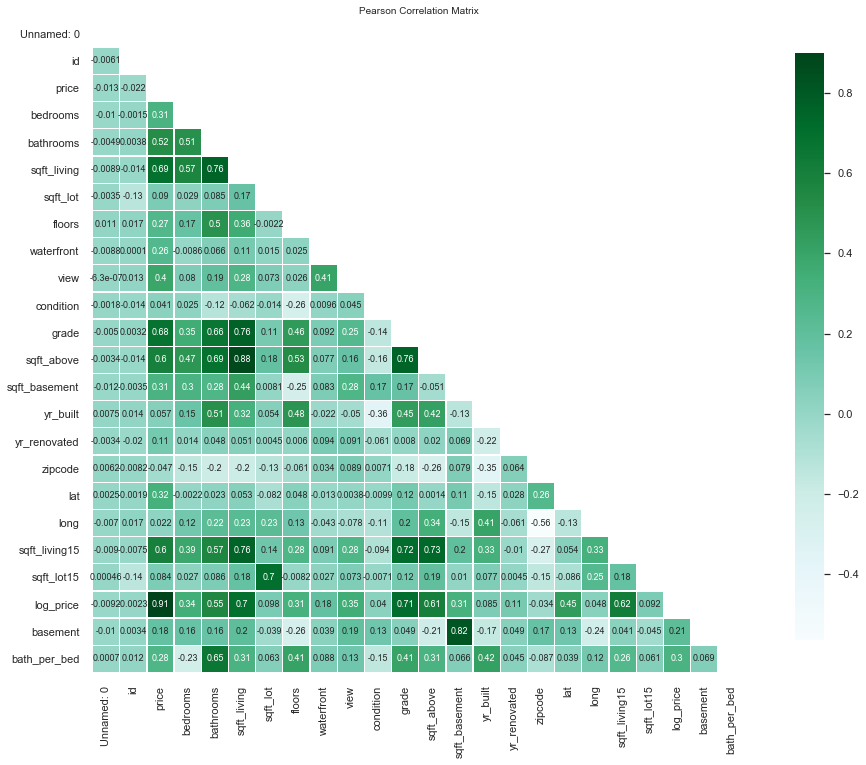

<Figure size 576x396 with 0 Axes>

In [13]:
# Checking the correlation between the features
mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(18, 12))
plt.title('Pearson Correlation Matrix',fontsize=10)

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.9,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});
plt.show()
plt.savefig("pearson_co_map.png")

# VIF

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from patsy import dmatrices

In [34]:
features = "+".join(df.columns)
features = features.replace('price+', '', 1)
features = features.replace('log_price+', '', 1)
features = features.replace('date+', '', 1)
features = features.replace('id+', '', 1)
y, X = dmatrices('price~' + features, df, return_type='dataframe')

In [35]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

/Users/alexzieky/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [36]:
vif.sort_values(by = "VIF_Factor",ascending=False).head(10)

,VIF_Factor,features
10,inf,sqft_above
3,inf,sqft_living
11,inf,sqft_basement
0,4.599974e+06,Intercept
2,1.137510e+01,bathrooms
20,7.122545e+00,bath_per_bed
1,5.295729e+00,bedrooms
19,3.529109e+00,basement
9,3.460764e+00,grade
17,2.973079e+00,sqft_living15


# EDA

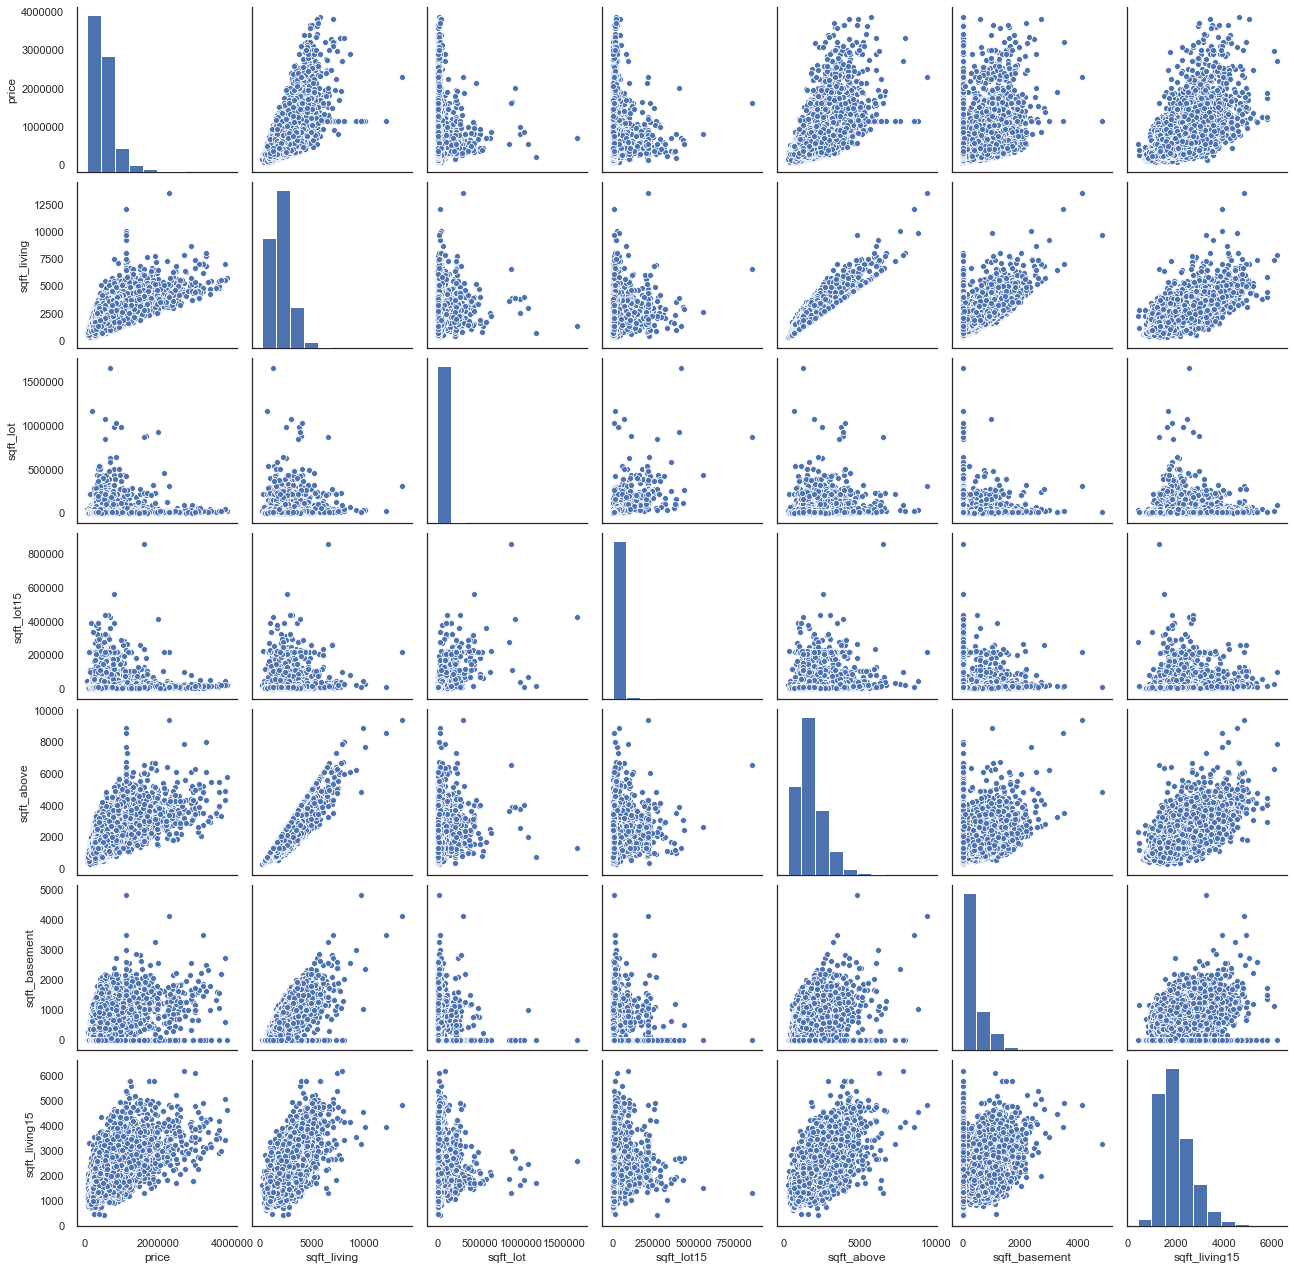

In [14]:
sns.pairplot(df[['price','sqft_living', 'sqft_lot', 'sqft_lot15', 'sqft_above','sqft_basement',
                 'sqft_living15']])
plt.savefig("pairplot.png")

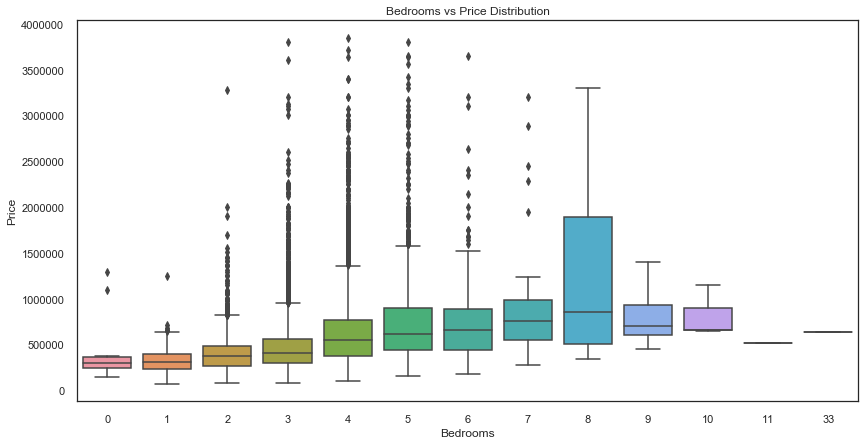

In [15]:
# Comparing the Price of a house using Bedrooms 
## Seems to not effect the mean by much 

fig, ax = plt.subplots(figsize=(14, 7))
sns.boxplot(x='bedrooms', y="price", data=df)
ax.set(xlabel='Bedrooms', ylabel='Price',title='Bedrooms vs Price Distribution');
plt.savefig("beds_vs_price.png")

In [38]:
df[df['bedrooms'] > 10]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,basement,bath_per_bed
2356,2356,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,13.161584,1,0.272727
8597,8597,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,13.369223,1,0.053030


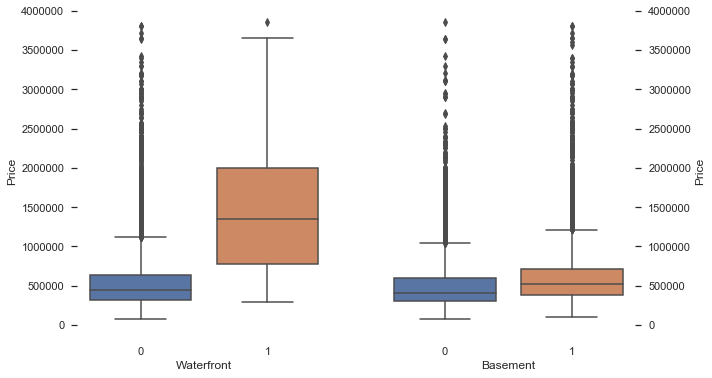

In [16]:
# Boxplots comparing 
#(1) Houses with waterfront to Houses without waterfront
## Waterfront houses seem to be significantly more expensive 
#(2) Houses with basement to Houses without basements 
## Not a great difference between house with/without basements

f, axes = plt.subplots(1, 2,figsize=(10,6))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['basement'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Basement', ylabel='Price')
plt.savefig("water_bsement.png")

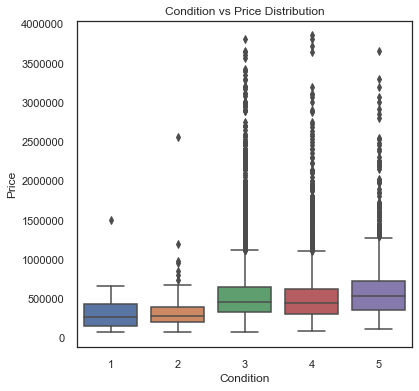

In [17]:
# Boxplots comparing the condition of the house vs price

fig, ax = plt.subplots(figsize=(6, 6))
sns.boxplot(x='condition', y="price", data=df)
ax.set(xlabel='Condition', ylabel='Price',title='Condition vs Price Distribution');
plt.savefig("condition.png")

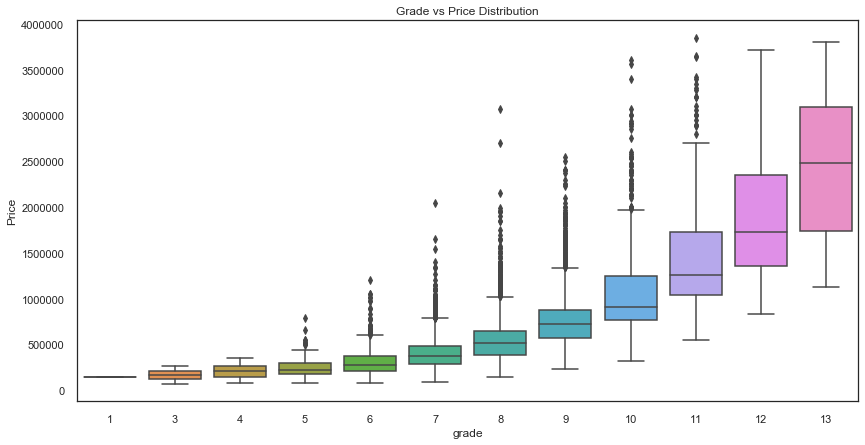

In [18]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.boxplot(x='grade', y="price", data=df)
ax.set(xlabel='grade', ylabel='Price',title='Grade vs Price Distribution');
plt.savefig("Grade_vs_Price.png")

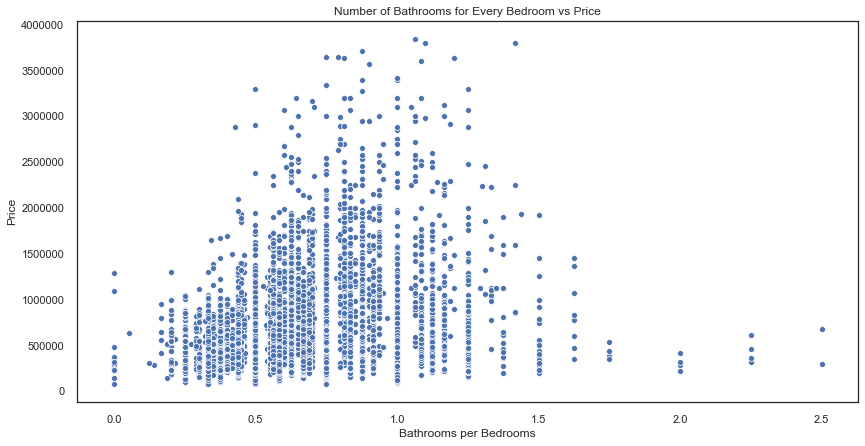

In [19]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.scatterplot(x='bath_per_bed', y="price", data=df)
ax.set(xlabel='Bathrooms per Bedrooms', ylabel='Price',title='Number of Bathrooms for Every Bedroom vs Price');
plt.savefig("bath_per_bed.png")

In [94]:
features_df = df.drop(columns=['id', 'price','date','log_price','sqft_lot15','zipcode','floors'])
str_features_col= "+".join(features_df)
mlr_model = smf.ols(formula=f'price~{str_features_col}', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2445.
Date:                Fri, 23 Oct 2020   Prob (F-statistic):               0.00
Time:                        04:22:33   Log-Likelihood:            -2.3501e+05
No. Observations:               17290   AIC:                         4.700e+05
Df Residuals:                   17273   BIC:                         4.702e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.746e+07   1.67e+06    -22.436      0.000   -4.07e+07   -3.42e+07
bedrooms      -3.139e+04   3593.230     -8.737      0.000   -3.84e+04   -2.44e+04
bathrooms      5.679e+04   6437.955      8.821      0.000    4.42e+04    6.94e+04
sqft_living      75.8341      2.734     27.737      0.000      70.475      81.193
sqft_lot          0.0410      0.036      1.124      0.261      -0.030       0.113
waterfront     4.804e+05   1.82e+04     26.341      0.000    4.45e+05    5.16e+05
view           5.041e+04   2269.362     22.215      0.000     4.6e+04    5.49e+04
condition      3.314e+04   2500.538     13.253      0.000    2.82e+04     3.8e+04
grade          1.046e+05   2320.702     45.083      0.000       1e+05    1.09e+05
sqft_above       55.3560      3.154     17.550      0.000      49.173      61.538
sqft_basement    20.4780      4.302      4.760      0.000      12.046      28.910
yr_built      -2343.8014     75.845    -30.902      0.000   -2492.466   -2195.137
yr_renovated     20.0795      3.936      5.102      0.000      12.365      27.794
lat            5.621e+05   1.12e+04     50.134      0.000     5.4e+05    5.84e+05
long          -1.195e+05   1.26e+04     -9.461      0.000   -1.44e+05   -9.48e+04
sqft_living15    51.2257      3.659     13.999      0.000      44.053      58.398
basement       7777.0405   5651.319      1.376      0.169   -3300.117    1.89e+04
bath_per_bed  -5.638e+04   1.83e+04     -3.082      0.002   -9.22e+04   -2.05e+04
==============================================================================
Omnibus:                    10092.905   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           271993.354
Skew:                           2.311   Prob(JB):                         0.00
Kurtosis:                      21.873   Cond. No.                     1.89e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.8e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""